In [1]:
import numpy as np

## numpy金融函数

In [3]:
from matplotlib.pyplot import plot, show
# 买一个房子，首付1000w，剩余贷款5年，每年还4次，每期还款10w，年利率0.03
# 计算到期末时一共花了多少钱？即相当于如果5年后全款买这套房子花了多少钱
print("Future value", np.fv(0.03/4, 5 * 4, -10, -1000))

Future value 1376.0963320407982


In [20]:
r=0.03/4
a1=1000*(1+r)**20
a2=10*((1+r)**20-1)/r

In [21]:
a1+a2

1376.0963320407982

In [5]:
#现值  
print("Present value", np.pv(0.03/4, 5 * 4, -10, 1376.09633204))

Present value -999.9999999993126


In [6]:
#净现值
cashflows = np.random.randint(100, size=5)
cashflows = np.insert(cashflows, 0, -100)
print("Cashflows", cashflows)

Cashflows [-100   24    6   76   79   67]


In [7]:
print("Net present value", np.npv(0.03, cashflows))

Net present value 126.49257777850747


In [22]:
-100+24/(1+0.03)+6/(1+0.03)**2+76/(1+0.03)**3+79/(1+0.03)**4+67/(1+0.03)**5

126.49257777850747

In [24]:
#内部收益率irr
print("Internal rate of return", np.irr([-100, 24 , 6, 76, 79, 67]))

Internal rate of return 0.3092467363712803


In [10]:
print("Internal rate of return", np.irr([-100, 110]))

Internal rate of return 0.10000000000000009


In [9]:
print("Modified internal rate of return", np.mirr([-100, 38, 48, 90, 17, 36], 0.03, 0.03))


Modified internal rate of return 0.1955097613307959


In [26]:
#分期付款  等额还款
print("Payment", np.pmt(0.01/12, 12 * 30, 10000000))

Payment -32163.95204465004


In [38]:
r=0.01/12
q=1/(1+r)
# pmt*q*(q**360-1)/(q-1)=10000000
10000000*(q-1)/((q**360-1)*q)

32163.952044646507

In [13]:
#付款期数
print("Number of payments", np.nper(0.10/12, -100, 9000))

Number of payments 167.04751180075235


In [15]:
#利率

print("Interest rate", 12 * np.rate(167, -100, 9000, 0))

Interest rate 0.09997564206640422


## 内存优化方面的技巧

In [4]:
x = np.ones((3, 4))
y = np.ones((3, 4))
before = id(y)
before

4496921504

In [5]:
y = y + x
id(y) == before

False

可以看到在y赋值操作后是新开了内存的。如果不想让新开内存

In [6]:
y = np.ones((3, 4))
before = id(y)
y[:] = x + y
id(y) == before

True

## 用numpy生成向量

### 注意如下方式生成的只是数组，而不是向量！！！

In [3]:
a = np.random.randn(5)
a

array([-1.07168447, -1.37614176, -0.54540806,  0.54994061,  0.3317809 ])

In [4]:
a.T

array([-1.07168447, -1.37614176, -0.54540806,  0.54994061,  0.3317809 ])

In [5]:
a.shape

(5,)

In [6]:
a * a.T

array([1.14850759, 1.89376615, 0.29746995, 0.30243468, 0.11007857])

### 采用以下方式生成向量，

In [7]:
a = np.random.randn(5,1)
a

array([[ 1.01622595],
       [ 0.33205095],
       [ 0.47420917],
       [-1.65770468],
       [-1.90864558]])

In [8]:
a.T

array([[ 1.01622595,  0.33205095,  0.47420917, -1.65770468, -1.90864558]])

In [10]:
a.shape

(5, 1)

In [9]:
a * a.T

array([[ 1.03271519,  0.33743879,  0.48190367, -1.68460252, -1.93961518],
       [ 0.33743879,  0.11025783,  0.15746161, -0.55044241, -0.63376758],
       [ 0.48190367,  0.15746161,  0.22487434, -0.78609876, -0.90509724],
       [-1.68460252, -0.55044241, -0.78609876,  2.74798482,  3.16397072],
       [-1.93961518, -0.63376758, -0.90509724,  3.16397072,  3.64292795]])

## numpy中的广播机制(broadcasting)
简单来说，broadcasting可以这样理解：如果你有一个mn的矩阵，让它加减乘除一个1n的矩阵，它会被复制m次，成为一个mn的矩阵，然后再逐元素地进行加减乘除操作。同样地对m1的矩阵成立
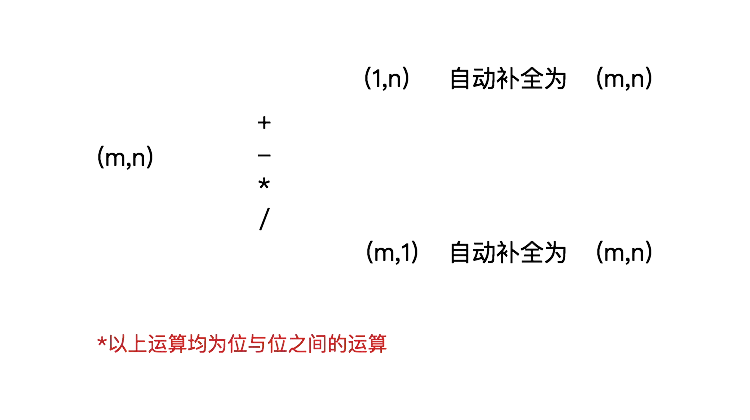

In [12]:
A = np.array([1,2,3])
result = A + 100
print(result)

[101 102 103]


In [18]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
result = A + [100, 200, 300]
print(result)

[[101 202 303]
 [104 205 306]]


In [17]:
A + np.array([100, 200]).reshape((2,1))

array([[101, 102, 103],
       [204, 205, 206]])

## 一些属性

### 无穷大

In [3]:
np.inf

inf

In [4]:
np.inf > 10000000

True

In [3]:
arr = np.arange(15).reshape(5, 3)

### 获取数组的shape

In [4]:
arr.shape

(5, 3)

In [5]:
np.shape(arr)

(5, 3)

### 生成matrix对象(一般不建议使用吧。。。

In [50]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [51]:
np.asmatrix(arr)

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [53]:
np.matrix(arr)

matrix([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

## 维度转换

### reshape

In [70]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
arr.reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [21]:
'''
Return a copy of the array collapsed(坍塌) into one dimension.
@order: {'C', 'F', 'A', 'K'}, optional
'C' means to flatten in row-major (C-style) order.
'F' means to flatten in column-major (Fortran-
style) order. 'A' means to flatten in column-major
order if `a` is Fortran *contiguous* in memory,
row-major order otherwise. 'K' means to flatten
`a` in the order the elements occur in memory.
The default is 'C'.
'''
arr.reshape((2, 4), order='F')

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

### 打平成1维

In [17]:
arr.ravel()

array([0, 0, 1, 3, 4, 0, 4, 3])

In [18]:
arr.reshape((2, 4)).ravel()

array([0, 0, 1, 3, 4, 0, 4, 3])

In [20]:
np.ravel(arr.reshape((2, 4)))

array([0, 0, 1, 3, 4, 0, 4, 3])

In [11]:
np.arange(8).reshape((2, 4)).flat

In [13]:
for a in np.arange(8).reshape((2, 4)).flat:
    print(a)

0
1
2
3
4
5
6
7


In [12]:
np.arange(8).reshape((2, 4)).flatten()

array([0, 1, 2, 3, 4, 5, 6, 7])

### 增加一个维度

In [18]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [20]:
arr.reshape((-1, 1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [72]:
np.expand_dims(arr, axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [73]:
np.expand_dims(arr, axis=1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [19]:
arr[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

### squeeze 函数：从数组的形状中删除单维度条目，即把shape中为1的维度去掉

In [6]:
a = np.arange(10).reshape((1,1,2,1,5, 1))
a

array([[[[[[0],
           [1],
           [2],
           [3],
           [4]]],


         [[[5],
           [6],
           [7],
           [8],
           [9]]]]]])

In [7]:
a.shape

(1, 1, 2, 1, 5, 1)

In [8]:
a.squeeze()

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

## ndarray切片

## ndarray合并

In [2]:
arr1 = np.arange(8).reshape((2, 4))
arr2 = np.random.randn(2, 4)

### np.concatenate

In [62]:
np.concatenate((arr1, arr2))

array([[ 0.        ,  1.        ,  2.        ,  3.        ],
       [ 4.        ,  5.        ,  6.        ,  7.        ],
       [-0.20558031, -1.87406768,  0.66159744, -2.27991831],
       [ 1.80279172, -0.57716586, -0.58042856, -0.65255574]])

In [63]:
np.concatenate((arr1, arr2), axis=1)

array([[ 0.        ,  1.        ,  2.        ,  3.        , -0.20558031,
        -1.87406768,  0.66159744, -2.27991831],
       [ 4.        ,  5.        ,  6.        ,  7.        ,  1.80279172,
        -0.57716586, -0.58042856, -0.65255574]])

### np.vstack | np.hstack

In [64]:
np.vstack((arr1, arr2))

array([[ 0.        ,  1.        ,  2.        ,  3.        ],
       [ 4.        ,  5.        ,  6.        ,  7.        ],
       [-0.20558031, -1.87406768,  0.66159744, -2.27991831],
       [ 1.80279172, -0.57716586, -0.58042856, -0.65255574]])

In [65]:
np.hstack((arr1, arr2))

array([[ 0.        ,  1.        ,  2.        ,  3.        , -0.20558031,
        -1.87406768,  0.66159744, -2.27991831],
       [ 4.        ,  5.        ,  6.        ,  7.        ,  1.80279172,
        -0.57716586, -0.58042856, -0.65255574]])

### np.c_ | np.r_
np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。

np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

In [3]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ,  2.        ,  3.        ],
       [ 4.        ,  5.        ,  6.        ,  7.        ],
       [-0.35656944, -0.76316801,  2.60948819,  0.79686435],
       [ 0.64158651, -0.26508957, -0.60328599, -0.22472195]])

In [4]:
np.c_[arr1, arr2]

array([[ 0.        ,  1.        ,  2.        ,  3.        , -0.35656944,
        -0.76316801,  2.60948819,  0.79686435],
       [ 4.        ,  5.        ,  6.        ,  7.        ,  0.64158651,
        -0.26508957, -0.60328599, -0.22472195]])

In [7]:
np.c_[np.ones(arr1.shape[0]), arr1]

array([[1., 0., 1., 2., 3.],
       [1., 4., 5., 6., 7.]])

## 赋值

In [2]:
arr = np.arange(8).reshape((2, 4))
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [3]:
arr[:, 2] = [8, 9]

In [4]:
arr

array([[0, 1, 8, 3],
       [4, 5, 9, 7]])

## 比较

In [1]:
import numpy as np

In [2]:
a = np.arange(8).reshape((2, 4))
b = np.arange(8).reshape((2, 4))

In [3]:
a == b

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [4]:
np.array_equal(a, b)

True

In [5]:
np.allclose(a, b)

True

## 描述性统计

In [ ]:
max(), min(), sum(), sqrt(), square()

In [6]:
arr = np.arange(8).reshape((2, 4))
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### mean

In [7]:
np.mean(arr)

3.5

In [8]:
np.mean(arr, axis=0)

array([2., 3., 4., 5.])

In [9]:
arr.mean(axis=0)

array([2., 3., 4., 5.])

### 中位数median

In [10]:
np.median(arr)

5.0

In [80]:
arr1

array([[0, 1, 2],
       [3, 4, 5]])

### prod乘积。
* axis=None: 返回所有元素乘积
* axis=0: 返回每列的乘积

In [81]:
np.prod(arr1)

0

In [82]:
np.prod(arr1, axis=0)

array([ 0,  4, 10])

### 众数mode

In [93]:
arr = np.array([1, 9, 6, 4, 8, 5, 7, 3, 2, 8, 3, 8, 3, 9, 7, 9, 5, 1, 5, 3])

In [6]:
np.mode(arr)

AttributeError: module 'numpy' has no attribute 'mode'

#### 方法一

##### 计算非负整数的出现次数
Count number of occurrences of each value in array of non-negative ints.

In [11]:
np.bincount(arr)

array([0, 2, 1, 4, 1, 3, 1, 2, 3, 3])

In [9]:
#np中没有直接求众数的方法
#bincount统计了每个索引位置出现的次数，注意arr的元素只能是正整数
#如结果第一个元素0表示0在arr中出现了0次
# #间接求众数
np.argmax(np.bincount(arr))

3

#### 方法二：scipy.stats

In [92]:
from scipy import stats

In [10]:
r = stats.mode(arr)  # 表示3出现了4次
r

ModeResult(mode=array([3]), count=array([4]))

In [11]:
r.mode

array([3])

In [12]:
r.count

array([4])

#### 方法3 转换为pd.DataFrame或者Series

In [94]:
import pandas as pd

In [95]:
s = pd.Series(arr)

In [96]:
s.mode()

0    3
dtype: int64

### cumsum累积和

In [98]:
arr

array([1, 9, 6, 4, 8, 5, 7, 3, 2, 8, 3, 8, 3, 9, 7, 9, 5, 1, 5, 3])

In [97]:
np.cumsum(arr)

array([  1,  10,  16,  20,  28,  33,  40,  43,  45,  53,  56,  64,  67,
        76,  83,  92,  97,  98, 103, 106])

### ndarray中非0元素的个数

In [14]:
np.count_nonzero(arr)

5

In [16]:
np.count_nonzero(arr.reshape((2, 4)))

5

## elementwise运算

In [2]:
arr1 = np.arange(6).reshape((2, 3))
arr1

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
np.log(arr1+1)

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947]])

### np.clip

In [11]:
np.clip(np.random.rand(5), 0.4, 0.7)

array([0.4611924 , 0.7       , 0.4       , 0.63426303, 0.7       ])

In [12]:
np.max(arr1)

5

In [13]:
np.maximum(arr1, 3)

array([[3, 3, 3],
       [3, 4, 5]])

In [75]:
arr1 - 1

array([[-1,  0,  1],
       [ 2,  3,  4]])

In [76]:
arr1 - np.array([[1],
                [2]])

array([[-1,  0,  1],
       [ 1,  2,  3]])

In [77]:
arr1 - np.array([1, 2, 3])

array([[-1, -1, -1],
       [ 2,  2,  2]])

In [78]:
arr1 - np.array([[1, 2, 3]])

array([[-1, -1, -1],
       [ 2,  2,  2]])

In [79]:
arr1 - np.array([[1, 2]])

ValueError: operands could not be broadcast together with shapes (2,3) (1,2) 

### np.power 幂

In [3]:
np.power(2, 3)  # 2**3

8

In [4]:
np.power([2, 3], 3)  # 2**3, 3**3

array([ 8, 27])

In [5]:
np.power([2, 3], [2, 3])  # 2**2, 3**3

array([ 4, 27])

### 对应位置的元素相乘/除

In [3]:
arr1 * arr1

array([[ 0,  1,  4],
       [ 9, 16, 25]])

In [4]:
arr1 / (arr1 + 1)

array([[0.        , 0.5       , 0.66666667],
       [0.75      , 0.8       , 0.83333333]])

## 沿着某一维度运算

In [1]:
import pandas as pd

In [4]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
np.apply_along_axis(lambda v: dict(zip(df2.columns, v)), axis=1, arr=df2.values)

array([{'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 1.0, 'D': 3, 'E': 'test', 'F': 'foo'},
       {'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 1.0, 'D': 3, 'E': 'train', 'F': 'foo'},
       {'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 1.0, 'D': 3, 'E': 'test', 'F': 'foo'},
       {'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 1.0, 'D': 3, 'E': 'train', 'F': 'foo'}],
      dtype=object)

## 多项式运算

### 多项式表达方式

In [8]:
p = np.array([1,0,-3,5])
x = 5
print(np.polyval(p,x))

115


In [11]:
x**3 - 3*x**1 + 5

115

### 多项式求解

In [12]:
p = np.array([1,0,-3,5])
b = np.roots(p)
b

array([-2.27901879+0.j        ,  1.13950939+0.94627954j,
        1.13950939-0.94627954j])

In [13]:
np.real(b)

array([-2.27901879,  1.13950939,  1.13950939])

### 多项式乘法(卷积)
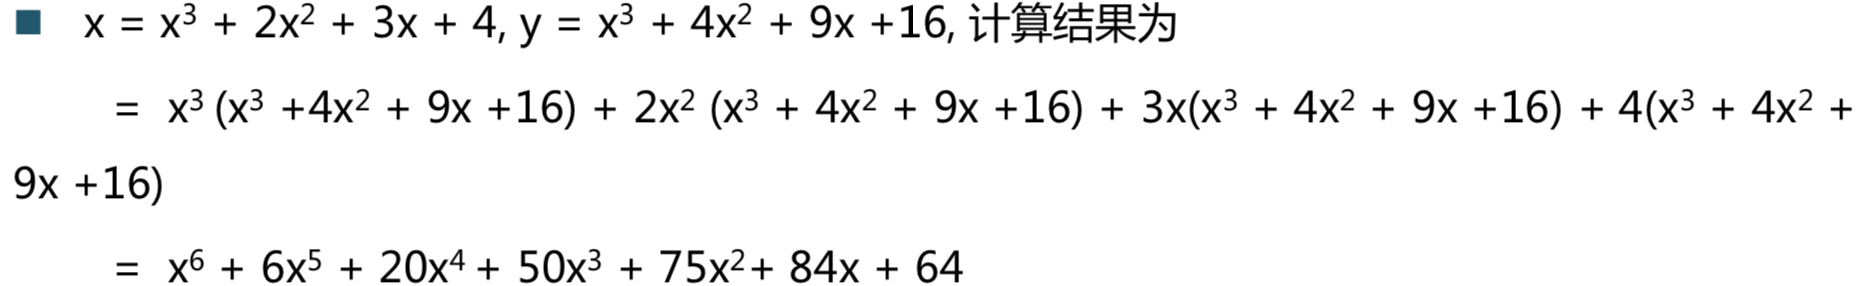

In [14]:
a =[1,2,3,4]; b = [1,4,9,16]
print(np.convolve(a,b))

[ 1  6 20 50 75 84 64]


### 多项式的曲线拟合

#### 函数拟合

In [15]:
x = [1,2,3,4,5]
y = [5.6,40,150,250,498]
p = np.polyfit(x,y,3)
print (p)

[  6.03333333 -24.5         83.06666667 -62.48      ]


In [17]:
import matplotlib.pyplot as plt

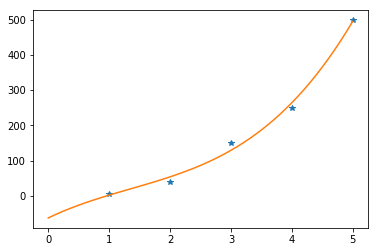

In [18]:
#拟合结果
x2 = np.arange(0,5.1,0.1)
y2 = np.polyval(p,x2)
plt.plot(x,y,'*',x2,y2)
plt.show()

#### 多项式插值

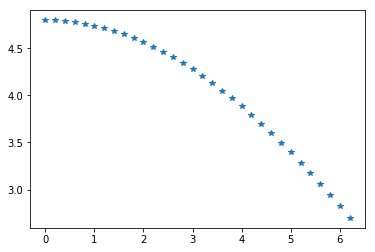

In [19]:
import math as math
x = list(np.arange(0,2*math.pi,0.2))

def g(x):
    return 4.8*math.cos(math.pi*x/20.0)

#y = math.cos(math.pi*x/20.0)
y = []
for t in x:
    g1 = g(t)
    y.append(g1)
    
plt.plot(x,y,'*')
plt.show()

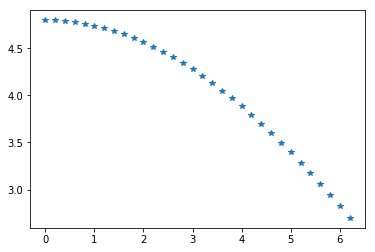

In [20]:
#第二种方法创建x和y
g = lambda x: 4.8*math.cos(math.pi*x/20.0)
x = list(np.arange(0,2*math.pi,0.2))
y = [g(x) for x in list(np.arange(0,2*math.pi,0.2))]
plt.plot(x,y,'*')
plt.show()

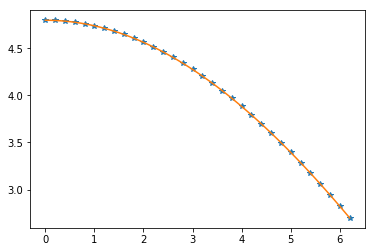

In [21]:
#多项式插值
import scipy.interpolate as itp
x1 = np.arange(0,2*math.pi,0.1)
g2 = itp.interp1d(x,y,kind='cubic')
y1 =g2(x1)
#作图
plt.plot(x,y,'*',x1,y1)
plt.show()

## 数值积分计算
在一个实数区 间上的定积分可以理解为在坐标平面上，由曲线、直线以及轴围成的曲边梯形的面积值

In [22]:
import scipy.integrate
import math
F = lambda x: x**3 - 2 *x -5
Q =scipy.integrate.quad(F,0,2)

print(Q[0])

-10.0


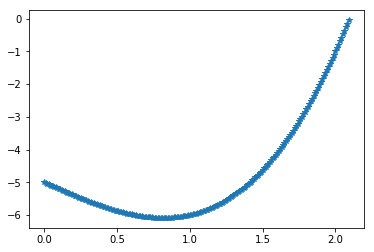

In [23]:
t = np.arange(0,2.1,0.01)
g = F(t)

plt.plot(t,g,'*')
plt.show()

In [24]:
# 计算积分求解
def h(x):
    return 0.25*x**4 - x**2 -5*x

h(2) - h(0)

-10.0

In [25]:
# 4.3.2符号积分计算
#SymPy 的核心功能是将数学符号表示为 Python 对象。
#在 SymPy 库中，类 sympy.Symbol 可用于此目的
#==============================================================================
from sympy import *
x =  Symbol("x")
y =  Symbol('y',real=True)
s = integrate(x * y, (x,int("0"), int("1")), (y,int("1"),int("2")))
print(s)

3/4


In [26]:
#或者
s =  integrate(x * y, (x,int("0"), int("1")))
ss = integrate(s, (y,int("1"), int("2")))
print(s)
print(ss)

y/2
3/4


## 导数计算

In [27]:
#求导
x = Symbol('x',real=True)
y = Symbol('y',real=True)
z = Symbol("z")
expr = x**4 + x**3 + x**2 + x + 1
expr.diff(x)

4*x**3 + 3*x**2 + 2*x + 1

In [28]:
#多元函数
from sympy import *
expr = (x + 1) ** 3 * y ** 2 *(z - 1)
expr.diff(x,y)

6*y*(x + 1)**2*(z - 1)

## 线性代数&矩阵运算

### 线性方程组求解

In [29]:
A = np.array([[4,-2,1],[-2,4,-2],[1,-2,4]])
B = np.array([11,-16,17])
print(np.linalg.solve(A,B))

[ 1. -2.  3.]


### 矩阵特征值和特征向量

In [30]:
A = np.array([[4,-2,1],[-2,4,-2],[1,-2,4]])
d,v = np.linalg.eig(A)
print(d,v)

[7.37228132 3.         1.62771868] [[-5.41774320e-01  7.07106781e-01  4.54401349e-01]
 [ 6.42620551e-01  2.73458602e-16  7.66184591e-01]
 [-5.41774320e-01 -7.07106781e-01  4.54401349e-01]]


In [31]:
#验证
print(np.dot( np.matrix(A), np.matrix(v[:,1].reshape(-1,1))))
print(np.dot(np.matrix(v[:,1].reshape(-1,1)),d[1]))

[[ 2.12132034e+00]
 [ 1.33226763e-15]
 [-2.12132034e+00]]
[[ 2.12132034e+00]
 [ 8.20375805e-16]
 [-2.12132034e+00]]


### 求逆

In [83]:
arr = np.random.RandomState(14).randn(3, 3)
arr

array([[ 1.55133911,  0.07918602,  0.17397653],
       [-0.07233657, -2.0043294 ,  0.14467781],
       [-1.50116862,  0.21110945, -0.55820506]])

In [59]:
np.linalg.inv(arr)

array([[ 0.95314825,  0.07088078,  0.31544017],
       [-0.22558183, -0.52969762, -0.20759654],
       [-2.64859426, -0.39094625, -2.71827435]])

### 行列式

In [60]:
np.linalg.det(arr)

1.1417782564454833

### norm 范数

In [84]:
arr

array([[ 1.55133911,  0.07918602,  0.17397653],
       [-0.07233657, -2.0043294 ,  0.14467781],
       [-1.50116862,  0.21110945, -0.55820506]])

#### 向量的范数

In [89]:
np.linalg.norm(arr.ravel())

3.0160171097951203

##### 可以看出, 默认参数下 是向量的2范数就是每个元素的平方和再开平方根 = 向量模长！

In [90]:
np.sqrt(arr.ravel().dot(arr.ravel()))

3.0160171097951203

#### 矩阵的范数

In [85]:
np.linalg.norm(arr)

3.0160171097951203

In [87]:
np.abs(arr)

array([[1.55133911, 0.07918602, 0.17397653],
       [0.07233657, 2.0043294 , 0.14467781],
       [1.50116862, 0.21110945, 0.55820506]])

In [88]:
np.sum(np.abs(arr), axis=0)

array([3.1248443 , 2.29462488, 0.8768594 ])

### SVD分解

In [67]:
a = np.arange(48).reshape((12, 4))
#svd分解
U, s, Vh = np.linalg.svd(a, full_matrices=True)

In [69]:
U.shape, s, Vh.shape

((12, 12),
 array([1.88956663e+02, 3.92167338e+00, 1.34838487e-14, 9.73158362e-16]),
 (4, 4))

## ndarray数据保存和加载

### 默认情况下，数组以未压缩的原始二进制格式保存在扩展名为npy的文件中

In [ ]:
np.save('name.npy', arr)

### 加载save保存的npy文件

In [ ]:
arr = np.load('name.npy')

### 将1D/2D数组写入以某种分隔符隔开的文本文件中, 注意保存三维以上的数据会报错

In [ ]:
np.savetxt('name.txt', arr)

### 加载savetxt保存的txt文件

In [ ]:
arr = np.loadtxt('name.txt')

### Save several arrays into a single file in uncompressed .npz format.

In [ ]:
np.savez('tmp/a.npz', arr1=arr1, arr2=arr2) 

#### 或者压缩格式

In [ ]:
np.savez_compressed('tmp/a_compressed.npz', arr1=arr1, arr2=arr2)

### 加载npz文件

In [ ]:
a = np.load('tmp/a.npz')
print(a['arr1'], a['arr2'])